In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

## Data Reading

In [2]:
power= pd.read_csv("D:\climate_connect\power_actual.csv")

In [3]:
power.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,10/1/2017 0:00,0.0,0.0,0.0
1,1,10/1/2017 0:15,0.0,0.0,0.0
2,2,10/1/2017 0:30,0.0,0.0,0.0
3,3,10/1/2017 0:45,0.0,0.0,0.0
4,4,10/1/2017 1:00,0.0,0.0,0.0


In [4]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 5 columns):
Unnamed: 0    70080 non-null int64
datetime      70080 non-null object
ghi           35040 non-null float64
gti           35040 non-null float64
power         70080 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.7+ MB


In [5]:
round(power.isnull().sum()/len(power.index)*100,2)

Unnamed: 0     0.0
datetime       0.0
ghi           50.0
gti           50.0
power          0.0
dtype: float64

In [6]:
power.nunique()

Unnamed: 0    70080
datetime      70080
ghi               1
gti               1
power          2166
dtype: int64

## dropping 'ghi' and 'gti' as they have only 1 unique value, which wont help in analysis.

In [7]:
power = power.loc[:,power.nunique()!=1]

In [8]:
power.head()

,Unnamed: 0,datetime,power
0,0,10/1/2017 0:00,0.0
1,1,10/1/2017 0:15,0.0
2,2,10/1/2017 0:30,0.0
3,3,10/1/2017 0:45,0.0
4,4,10/1/2017 1:00,0.0


In [9]:
weat_act = pd.read_csv("D:\climate_connect\weather_actuals.csv")

In [10]:
weat_act.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,9/30/2017 18:30,10/1/2017 0:00,0.0,26.52,26,1,19.46,308,...,-9999.0,-9999.0,-9999.0,rain,3.57,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
1,1,1,9/30/2017 19:30,10/1/2017 1:00,0.0,28.78,27,1,20.06,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
2,2,1,9/30/2017 20:30,10/1/2017 2:00,0.0,26.58,26,1,19.97,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
3,3,1,9/30/2017 21:30,10/1/2017 3:00,0.0,23.84,23,1,18.66,270,...,-9999.0,-9999.0,-9999.0,rain,3.56,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
4,4,1,9/30/2017 22:30,10/1/2017 4:00,0.0,24.13,24,1,17.84,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37


In [11]:
weat_act.shape

(13619, 31)

In [12]:
weat_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 31 columns):
Unnamed: 0              13619 non-null int64
plant_id                13619 non-null int64
datetime_utc            13619 non-null object
datetime_local          13619 non-null object
cloud_cover             13619 non-null float64
apparent_temperature    13619 non-null float64
temperature             13619 non-null int64
humidity                13619 non-null int64
dew_point               13619 non-null float64
wind_bearing            13619 non-null int64
wind_speed              13619 non-null float64
wind_chill              3744 non-null float64
wind_gust               13619 non-null float64
heat_index              3744 non-null float64
pressure                13619 non-null float64
qpf                     3744 non-null float64
uv_index                13619 non-null int64
snow                    3744 non-null float64
pop                     3744 non-null float64
fctcode          

In [13]:
round(weat_act.isnull().sum()/len(weat_act.index)*100,2)

Unnamed: 0               0.00
plant_id                 0.00
datetime_utc             0.00
datetime_local           0.00
cloud_cover              0.00
apparent_temperature     0.00
temperature              0.00
humidity                 0.00
dew_point                0.00
wind_bearing             0.00
wind_speed               0.00
wind_chill              72.51
wind_gust                0.00
heat_index              72.51
pressure                 0.00
qpf                     72.51
uv_index                 0.00
snow                    72.51
pop                     72.51
fctcode                 72.51
ozone                    0.00
precip_accumulation     72.51
precip_intensity         0.00
precip_probability       0.00
precip_type             52.35
visibility               0.00
sunrise                  0.00
sunset                   0.00
icon                     0.00
summary                  0.00
updated_at               0.00
dtype: float64

## Merging the data frames power and weat_act into 1 data frame i.e training data to build our model.

In [14]:
train_df = pd.merge(power , weat_act,  how='inner', left_on=['datetime'], right_on = ['datetime_local'])

In [15]:
train_df.head()

,Unnamed: 0_x,datetime,power,Unnamed: 0_y,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,10/1/2017 0:00,0.0,0,1,9/30/2017 18:30,10/1/2017 0:00,0.0,26.52,26,...,-9999.0,-9999.0,-9999.0,rain,3.57,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
1,4,10/1/2017 1:00,0.0,1,1,9/30/2017 19:30,10/1/2017 1:00,0.0,28.78,27,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
2,8,10/1/2017 2:00,0.0,2,1,9/30/2017 20:30,10/1/2017 2:00,0.0,26.58,26,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
3,12,10/1/2017 3:00,0.0,3,1,9/30/2017 21:30,10/1/2017 3:00,0.0,23.84,23,...,-9999.0,-9999.0,-9999.0,rain,3.56,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
4,16,10/1/2017 4:00,0.0,4,1,9/30/2017 22:30,10/1/2017 4:00,0.0,24.13,24,...,-9999.0,-9999.0,-9999.0,rain,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37


## Null values analysis

In [16]:
round(train_df.isnull().sum()/len(train_df.index)*100,2)

Unnamed: 0_x             0.00
datetime                 0.00
power                    0.00
Unnamed: 0_y             0.00
plant_id                 0.00
datetime_utc             0.00
datetime_local           0.00
cloud_cover              0.00
apparent_temperature     0.00
temperature              0.00
humidity                 0.00
dew_point                0.00
wind_bearing             0.00
wind_speed               0.00
wind_chill              72.51
wind_gust                0.00
heat_index              72.51
pressure                 0.00
qpf                     72.51
uv_index                 0.00
snow                    72.51
pop                     72.51
fctcode                 72.51
ozone                    0.00
precip_accumulation     72.51
precip_intensity         0.00
precip_probability       0.00
precip_type             52.35
visibility               0.00
sunrise                  0.00
sunset                   0.00
icon                     0.00
summary                  0.00
updated_at

In [17]:
train_df.shape

(13619, 34)

### Dropping columns with high amount of null values as they are irrelavant to our model.

In [18]:
train_df.drop(['precip_type','precip_accumulation','heat_index','qpf','snow','pop','fctcode','wind_chill'],axis=1, inplace=True)

In [19]:
train_df.shape

(13619, 26)

In [20]:
train_df.head()

,Unnamed: 0_x,datetime,power,Unnamed: 0_y,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,...,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,updated_at
0,0,10/1/2017 0:00,0.0,0,1,9/30/2017 18:30,10/1/2017 0:00,0.0,26.52,26,...,-9999,-9999.0,-9999.0,-9999.0,3.57,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
1,4,10/1/2017 1:00,0.0,1,1,9/30/2017 19:30,10/1/2017 1:00,0.0,28.78,27,...,-9999,-9999.0,-9999.0,-9999.0,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
2,8,10/1/2017 2:00,0.0,2,1,9/30/2017 20:30,10/1/2017 2:00,0.0,26.58,26,...,-9999,-9999.0,-9999.0,-9999.0,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37
3,12,10/1/2017 3:00,0.0,3,1,9/30/2017 21:30,10/1/2017 3:00,0.0,23.84,23,...,-9999,-9999.0,-9999.0,-9999.0,3.56,10/1/2017 0:52,10/1/2017 12:45,clear-night,Clear,7/16/2019 16:37
4,16,10/1/2017 4:00,0.0,4,1,9/30/2017 22:30,10/1/2017 4:00,0.0,24.13,24,...,-9999,-9999.0,-9999.0,-9999.0,3.06,10/1/2017 0:52,10/1/2017 12:45,fog,Foggy,7/16/2019 16:37


## Removing column which will not add any significance  to our model

In [21]:
train_df.drop(['Unnamed: 0_x','Unnamed: 0_y','datetime','datetime_utc','updated_at','summary'],axis=1, inplace=True)

In [22]:
train_df.head()

,power,plant_id,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon
0,0.0,1,10/1/2017 0:00,0.0,26.52,26,1,19.46,308,0.83,-9999.0,1007.90,-9999,-9999.0,-9999.0,-9999.0,3.57,10/1/2017 0:52,10/1/2017 12:45,clear-night
1,0.0,1,10/1/2017 1:00,0.0,28.78,27,1,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,10/1/2017 0:52,10/1/2017 12:45,fog
2,0.0,1,10/1/2017 2:00,0.0,26.58,26,1,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,10/1/2017 0:52,10/1/2017 12:45,fog
3,0.0,1,10/1/2017 3:00,0.0,23.84,23,1,18.66,270,0.45,-9999.0,1008.12,-9999,-9999.0,-9999.0,-9999.0,3.56,10/1/2017 0:52,10/1/2017 12:45,clear-night
4,0.0,1,10/1/2017 4:00,0.0,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,10/1/2017 0:52,10/1/2017 12:45,fog


In [23]:
train_df.shape

(13619, 20)

## Looking at unique values of all the columns.

In [24]:
train_df.nunique()

power                    1631
plant_id                    1
datetime_local          13619
cloud_cover               102
apparent_temperature     3808
temperature                43
humidity                    2
dew_point                3432
wind_bearing              361
wind_speed                699
wind_gust                1067
pressure                 2919
uv_index                   14
ozone                    1262
precip_intensity          180
precip_probability         66
visibility                446
sunrise                   568
sunset                    568
icon                        8
dtype: int64

## Removing columns with 1 unique values as they wint add any difference to our model.

In [25]:
train_df = train_df.loc[:,train_df.nunique()!=1]

In [26]:
train_df.shape

(13619, 19)

In [27]:
train_df.nunique()

power                    1631
datetime_local          13619
cloud_cover               102
apparent_temperature     3808
temperature                43
humidity                    2
dew_point                3432
wind_bearing              361
wind_speed                699
wind_gust                1067
pressure                 2919
uv_index                   14
ozone                    1262
precip_intensity          180
precip_probability         66
visibility                446
sunrise                   568
sunset                    568
icon                        8
dtype: int64

In [28]:
round(train_df.isnull().sum()/len(train_df.index)*100,2)

power                   0.0
datetime_local          0.0
cloud_cover             0.0
apparent_temperature    0.0
temperature             0.0
humidity                0.0
dew_point               0.0
wind_bearing            0.0
wind_speed              0.0
wind_gust               0.0
pressure                0.0
uv_index                0.0
ozone                   0.0
precip_intensity        0.0
precip_probability      0.0
visibility              0.0
sunrise                 0.0
sunset                  0.0
icon                    0.0
dtype: float64

### Now we have our data frame in structured form and without any null values.

## Feature engineering

In [29]:
train_df[['apparent_temperature','temperature']].head()

,apparent_temperature,temperature
0,26.52,26
1,28.78,27
2,26.58,26
3,23.84,23
4,24.13,24


### the column 'apperent_temperature' is more relevant than 'temperature' as it the real temperature felt in the day

In [30]:
train_df.drop(['temperature'],axis=1, inplace=True)

In [31]:
train_df.head()

,power,datetime_local,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon
0,0.0,10/1/2017 0:00,0.0,26.52,1,19.46,308,0.83,-9999.0,1007.90,-9999,-9999.0,-9999.0,-9999.0,3.57,10/1/2017 0:52,10/1/2017 12:45,clear-night
1,0.0,10/1/2017 1:00,0.0,28.78,1,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,10/1/2017 0:52,10/1/2017 12:45,fog
2,0.0,10/1/2017 2:00,0.0,26.58,1,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,10/1/2017 0:52,10/1/2017 12:45,fog
3,0.0,10/1/2017 3:00,0.0,23.84,1,18.66,270,0.45,-9999.0,1008.12,-9999,-9999.0,-9999.0,-9999.0,3.56,10/1/2017 0:52,10/1/2017 12:45,clear-night
4,0.0,10/1/2017 4:00,0.0,24.13,1,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,10/1/2017 0:52,10/1/2017 12:45,fog


In [32]:
train_df.describe()

,power,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
count,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,35.255627,-314.005310,25.944639,0.537411,11.924626,-498.677363,-540.808704,-2393.184251,-733.594065,-2394.989280,-2187.730797,-2396.367775,-2396.398081,-117.086149
std,557.059759,1744.610028,10.469808,0.498617,9.129459,2557.943872,2267.247300,4270.333680,4018.429107,4269.320576,4385.706548,4268.545854,4268.528833,1130.763316
min,0.000000,-9999.000000,3.140000,0.000000,-20.560000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,0.000000,0.000000,17.310000,0.000000,5.920000,79.000000,1.620000,1.185000,998.750000,0.000000,236.900000,0.000000,0.000000,3.540000
50%,0.000000,0.000000,25.540000,1.000000,10.710000,149.000000,2.410000,3.070000,1006.900000,0.000000,270.800000,0.000000,0.000000,16.090000
75%,5.810000,0.410000,34.580000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000
max,15504.750000,1.000000,49.750000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000


In [33]:
train_df.dtypes

power                   float64
datetime_local           object
cloud_cover             float64
apparent_temperature    float64
humidity                  int64
dew_point               float64
wind_bearing              int64
wind_speed              float64
wind_gust               float64
pressure                float64
uv_index                  int64
ozone                   float64
precip_intensity        float64
precip_probability      float64
visibility              float64
sunrise                  object
sunset                   object
icon                     object
dtype: object

## Converting datetime columns in required format to help in analysis

In [34]:
train_df[['datetime_local','sunrise','sunset']].head()

,datetime_local,sunrise,sunset
0,10/1/2017 0:00,10/1/2017 0:52,10/1/2017 12:45
1,10/1/2017 1:00,10/1/2017 0:52,10/1/2017 12:45
2,10/1/2017 2:00,10/1/2017 0:52,10/1/2017 12:45
3,10/1/2017 3:00,10/1/2017 0:52,10/1/2017 12:45
4,10/1/2017 4:00,10/1/2017 0:52,10/1/2017 12:45


In [35]:
train_df['datetime_local'] = train_df['datetime_local'].astype(str)
train_df['datetime_local'] = train_df['datetime_local'].str.replace('/','-')
train_df['datetime_local'] = pd.to_datetime(train_df['datetime_local'],dayfirst=True)

In [36]:
train_df['sunrise'] = train_df['sunrise'].astype(str)
train_df['sunrise'] = train_df['sunrise'].str.replace('/','-')
train_df['sunrise'] = pd.to_datetime(train_df['sunrise'],dayfirst=True)

In [37]:
train_df['sunset'] = train_df['sunset'].astype(str)
train_df['sunset'] = train_df['sunset'].str.replace('/','-')
train_df['sunset'] = pd.to_datetime(train_df['sunset'],dayfirst=True)

In [38]:
train_df[['datetime_local','sunrise','sunset']].head()

,datetime_local,sunrise,sunset
0,2017-01-10 00:00:00,2017-01-10 00:52:00,2017-01-10 12:45:00
1,2017-01-10 01:00:00,2017-01-10 00:52:00,2017-01-10 12:45:00
2,2017-01-10 02:00:00,2017-01-10 00:52:00,2017-01-10 12:45:00
3,2017-01-10 03:00:00,2017-01-10 00:52:00,2017-01-10 12:45:00
4,2017-01-10 04:00:00,2017-01-10 00:52:00,2017-01-10 12:45:00


## making another column showing hours of the timestamp

In [39]:
train_df['datetime_hour'] = train_df['datetime_local'].dt.hour

In [40]:
train_df[['datetime_hour','datetime_local']].head()

,datetime_hour,datetime_local
0,0,2017-01-10 00:00:00
1,1,2017-01-10 01:00:00
2,2,2017-01-10 02:00:00
3,3,2017-01-10 03:00:00
4,4,2017-01-10 04:00:00


In [41]:
train_df['sunrise_hour'] = train_df['sunrise'].dt.hour

In [42]:
train_df['sunset_hour'] = train_df['sunset'].dt.hour

In [43]:
train_df[['sunrise_hour','sunset_hour']].head()

,sunrise_hour,sunset_hour
0,0,12
1,0,12
2,0,12
3,0,12
4,0,12


In [44]:
## making column to show duration of how much the plant was exposed to the sunlight at that time.

In [45]:
train_df['exposure_duration'] = train_df['datetime_hour'] -  train_df['sunrise_hour']

In [46]:
train_df.exposure_duration.head()

0    0
1    1
2    2
3    3
4    4
Name: exposure_duration, dtype: int64

## Making column to show how much the sun was there in the sky i.e how much was the daylight.

In [47]:
 train_df['daylight_duration']= train_df['sunset_hour'] - train_df['sunrise_hour']

In [48]:
train_df['daylight_duration'].head()

0    12
1    12
2    12
3    12
4    12
Name: daylight_duration, dtype: int64

In [49]:
train_df.head()

,power,datetime_local,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,...,precip_probability,visibility,sunrise,sunset,icon,datetime_hour,sunrise_hour,sunset_hour,exposure_duration,daylight_duration
0,0.0,2017-01-10 00:00:00,0.0,26.52,1,19.46,308,0.83,-9999.0,1007.90,...,-9999.0,3.57,2017-01-10 00:52:00,2017-01-10 12:45:00,clear-night,0,0,12,0,12
1,0.0,2017-01-10 01:00:00,0.0,28.78,1,20.06,-9999,-9999.00,-9999.0,-9999.00,...,-9999.0,3.06,2017-01-10 00:52:00,2017-01-10 12:45:00,fog,1,0,12,1,12
2,0.0,2017-01-10 02:00:00,0.0,26.58,1,19.97,-9999,-9999.00,-9999.0,-9999.00,...,-9999.0,3.06,2017-01-10 00:52:00,2017-01-10 12:45:00,fog,2,0,12,2,12
3,0.0,2017-01-10 03:00:00,0.0,23.84,1,18.66,270,0.45,-9999.0,1008.12,...,-9999.0,3.56,2017-01-10 00:52:00,2017-01-10 12:45:00,clear-night,3,0,12,3,12
4,0.0,2017-01-10 04:00:00,0.0,24.13,1,17.84,-9999,-9999.00,-9999.0,-9999.00,...,-9999.0,3.06,2017-01-10 00:52:00,2017-01-10 12:45:00,fog,4,0,12,4,12


 Now dropping the date time columns because we extracted the required information out of these columns , 
i.e the hour factor

In [50]:
train_df.drop(['datetime_local','sunrise','sunset'] ,axis=1 , inplace=True)

In [51]:
train_df.shape

(13619, 20)

train_df.head()

## Outlier treatment for the target variable 'power'

In [52]:
train_df.power.describe(percentiles=[0.75,0.90,0.95,0.990,0.991,0.993,0.994,0.995,0.997,0.999])

count    13619.000000
mean        35.255627
std        557.059759
min          0.000000
50%          0.000000
75%          5.810000
90%         12.470000
95%         14.001000
99%         16.168200
99.1%       16.293140
99.3%       16.783480
99.4%       17.145840
99.5%       61.610400
99.7%     4733.211740
99.9%    11044.371300
max      15504.750000
Name: power, dtype: float64

In [53]:
train_df.loc[(train_df['power'] >= 16.17)]

,power,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,icon,datetime_hour,sunrise_hour,sunset_hour,exposure_duration,daylight_duration
3012,16.28,0.00,20.89,0,7.17,302,1.30,-9999.00,1017.35,-9999,-9999.0,-9999.00,-9999.00,3.12,fog,12,1,12,11,11
3037,16.88,0.00,22.22,0,5.17,310,4.02,-9999.00,-9999.00,-9999,-9999.0,-9999.00,-9999.00,2.57,fog,13,1,12,12,11
3038,16.22,0.00,22.22,0,2.32,310,4.92,-9999.00,-9999.00,-9999,-9999.0,-9999.00,-9999.00,4.51,clear-day,14,1,12,13,11
3791,16.21,0.80,43.80,1,26.97,106,3.59,3.75,1000.28,7,268.4,0.59,0.13,16.09,partly-cloudy-day,12,0,13,12,13
4199,16.61,0.94,36.11,1,24.21,355,1.54,1.62,1004.15,5,279.4,0.31,0.11,16.09,cloudy,12,0,13,12,13
7392,16.43,0.00,19.60,0,0.61,316,5.63,6.87,1021.95,5,249.4,0.00,0.00,16.09,clear-day,13,1,12,12,11
7992,16.17,0.02,17.88,0,3.30,14,1.33,1.76,1018.49,5,333.0,0.00,0.00,16.09,clear-day,13,1,12,12,11
8015,16.48,0.00,17.84,0,4.95,304,3.61,4.67,1021.51,6,288.1,0.00,0.00,16.09,clear-day,12,1,12,11,11
8016,16.54,0.00,19.41,0,3.33,302,3.98,4.45,1020.82,6,286.4,0.00,0.00,16.09,clear-day,13,1,12,12,11
8207,16.27,0.04,20.64,0,9.62,305,4.21,5.71,1016.98,7,239.2,0.00,0.00,16.09,clear-day,12,1,12,11,11


In [54]:
train_df.loc[(train_df['power'] >= 16.17)].shape

(137, 20)

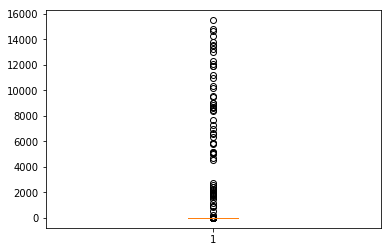

In [55]:
plt.boxplot(train_df.power)
Q1 = train_df.power.quantile(0.00)
Q3 = train_df.power.quantile(0.99)
IQR = Q3 - Q1
train_df = train_df[(train_df.power >= Q1 ) & (train_df.power <= Q3 )]

C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


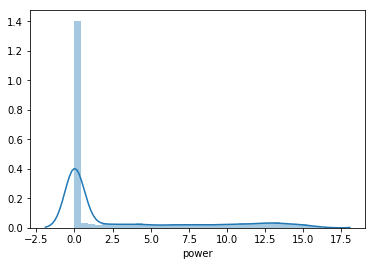

In [56]:
sns.distplot(train_df['power'], hist= True)

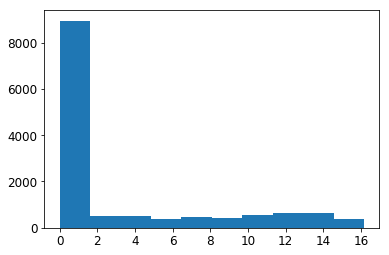

In [57]:
train_df['power'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)

In [58]:
train_df.shape

(13482, 20)

In [59]:
train_df.corr()

,power,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,datetime_hour,sunrise_hour,sunset_hour,exposure_duration,daylight_duration
power,1.000000,0.013563,0.248030,-0.261721,-0.021021,0.152094,0.124877,-0.005282,-0.002241,-0.004853,-0.005208,-0.005256,-0.005255,0.063011,0.071454,-0.024390,0.013453,0.073012,0.020051
cloud_cover,0.013563,1.000000,0.166130,-0.072129,0.062348,0.070114,0.075266,0.320622,0.401426,0.320622,0.320620,0.320622,0.320622,-0.019130,0.004086,-0.165844,0.145116,0.015950,0.167608
apparent_temperature,0.248030,0.166130,1.000000,-0.188541,0.564746,0.220315,0.187048,0.384604,0.280562,0.384716,0.385325,0.384511,0.384508,0.028081,0.249138,-0.788188,0.683849,0.304921,0.793175
humidity,-0.261721,-0.072129,-0.188541,1.000000,0.494919,-0.220559,-0.192337,-0.187549,-0.126324,-0.187705,-0.187455,-0.187608,-0.187614,0.053252,-0.250321,-0.015205,-0.056757,-0.248572,-0.025472
dew_point,-0.021021,0.062348,0.564746,0.494919,1.000000,-0.007030,-0.006992,0.082241,0.066677,0.082180,0.082900,0.082127,0.082119,0.046638,-0.041106,-0.590537,0.437540,0.001289,0.550659
wind_bearing,0.152094,0.070114,0.220315,-0.220559,-0.007030,1.000000,0.890304,0.470755,0.454961,0.470757,0.470757,0.470754,0.470754,-0.031844,0.094513,-0.173589,0.214279,0.106694,0.211800
wind_speed,0.124877,0.075266,0.187048,-0.192337,-0.006992,0.890304,1.000000,0.426803,0.476198,0.426803,0.426801,0.426803,0.426803,-0.025470,0.081386,-0.155829,0.193250,0.092330,0.190652
wind_gust,-0.005282,0.320622,0.384604,-0.187549,0.082241,0.470755,0.426803,1.000000,0.771736,1.000000,0.999996,1.000000,1.000000,-0.059862,0.000116,-0.408248,0.452647,0.029350,0.468212
pressure,-0.002241,0.401426,0.280562,-0.126324,0.066677,0.454961,0.476198,0.771736,1.000000,0.771736,0.771731,0.771736,0.771736,-0.046282,-0.031341,-0.312850,0.348064,-0.008856,0.359496
uv_index,-0.004853,0.320622,0.384716,-0.187705,0.082180,0.470757,0.426803,1.000000,0.771736,1.000000,0.999995,1.000000,1.000000,-0.059874,0.000175,-0.408229,0.452622,0.029407,0.468188


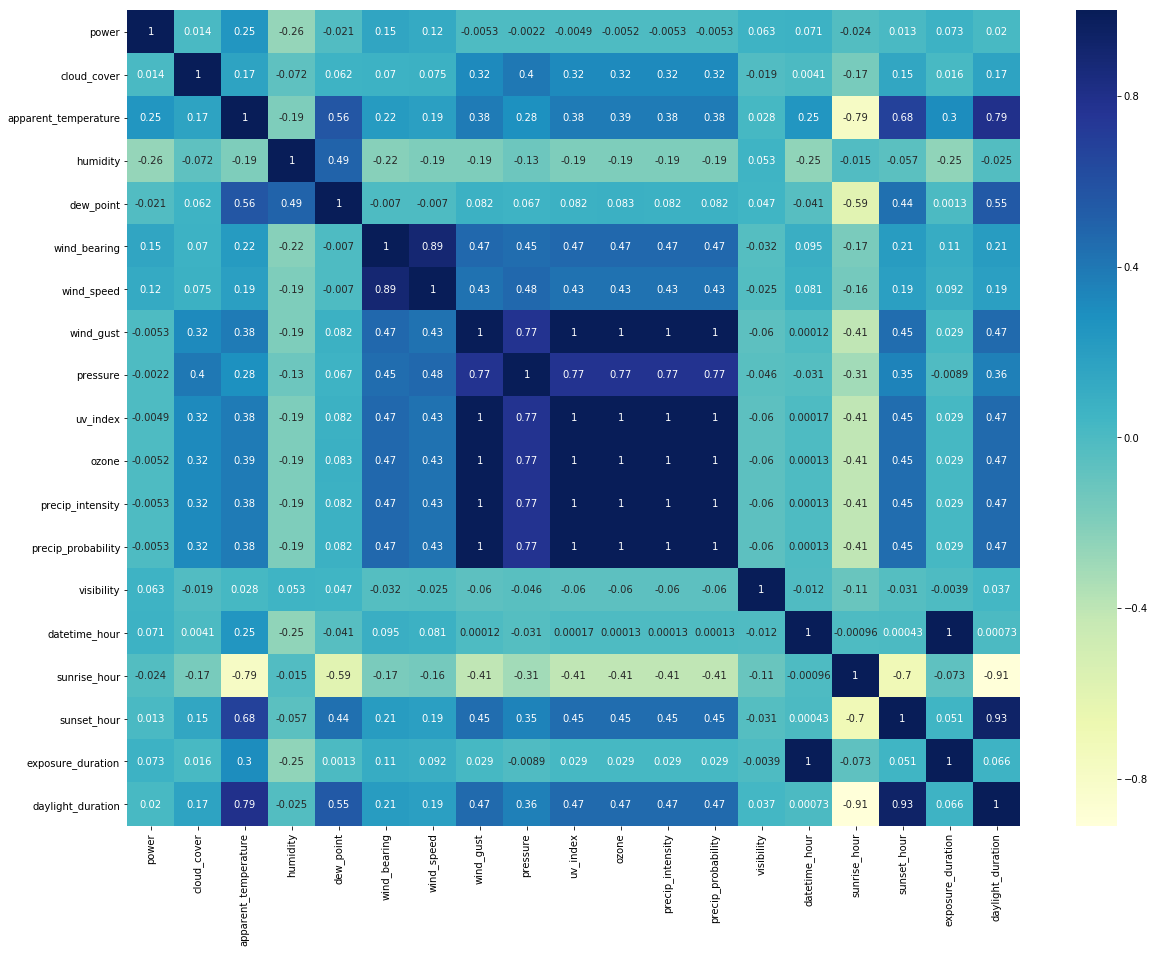

In [60]:
plt.figure(figsize=(20,15))
sns.heatmap(train_df.corr(),cmap='YlGnBu',annot=True)
plt.show()

This shows  that our target variable ‘power’ somewhat strongly correlates with ‘apparent_temperature

In [61]:
train_df.dtypes

power                   float64
cloud_cover             float64
apparent_temperature    float64
humidity                  int64
dew_point               float64
wind_bearing              int64
wind_speed              float64
wind_gust               float64
pressure                float64
uv_index                  int64
ozone                   float64
precip_intensity        float64
precip_probability      float64
visibility              float64
icon                     object
datetime_hour             int64
sunrise_hour              int64
sunset_hour               int64
exposure_duration         int64
daylight_duration         int64
dtype: object

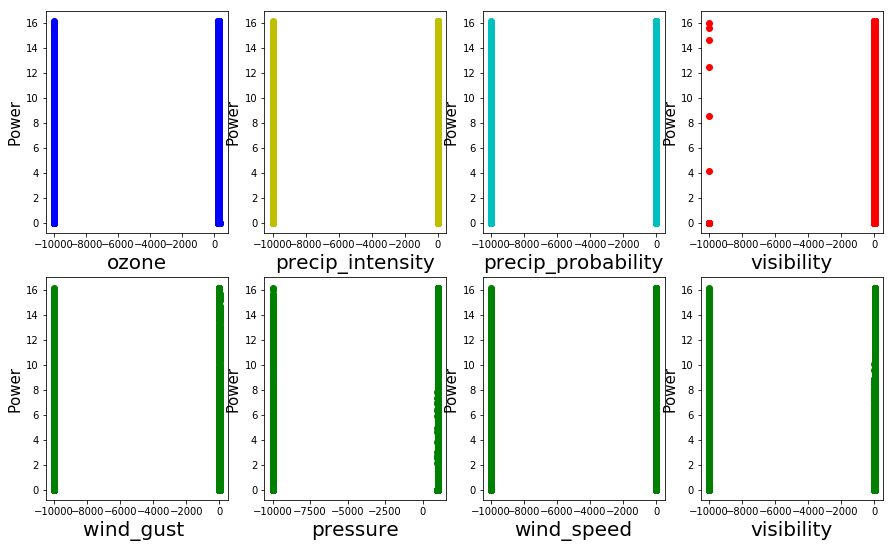

In [62]:
plt.figure(figsize=(15,9))
plt.subplot(2,4,1)
plt.scatter(train_df['ozone'] , train_df['power'],c='b')
plt.xlabel("ozone",fontsize=20)
plt.ylabel("Power",fontsize=15)


plt.subplot(2,4,2)
plt.scatter(train_df['precip_intensity'] , train_df['power'] , c='y')
plt.xlabel('precip_intensity',fontsize=20)
plt.ylabel("Power",fontsize=15)

plt.subplot(2,4,3)
plt.scatter(train_df['precip_probability'] , train_df['power'], c='c')
plt.xlabel("precip_probability",fontsize=20)
plt.ylabel("Power",fontsize=15)

plt.subplot(2,4,4)
plt.scatter(train_df['visibility'] , train_df['power'] ,c='r')
plt.xlabel("visibility",fontsize=20)
plt.ylabel("Power",fontsize=15)

plt.subplot(2,4,5)
plt.scatter(train_df['wind_gust'] , train_df['power'],c='g')
plt.xlabel("wind_gust ",fontsize=20)
plt.ylabel("Power",fontsize=15)


plt.subplot(2,4,6)
plt.scatter(train_df['pressure'] , train_df['power'],c='g')
plt.xlabel("pressure",fontsize=20)
plt.ylabel("Power",fontsize=15)


plt.subplot(2,4,7)
plt.scatter(train_df['uv_index'] , train_df['power'],c='g')
plt.xlabel("wind_speed",fontsize=20)
plt.ylabel("Power",fontsize=15)


plt.subplot(2,4,8)
plt.scatter(train_df['uv_index'] , train_df['power'],c='g')
plt.xlabel("visibility",fontsize=20)
plt.ylabel("Power",fontsize=15)


plt.show()

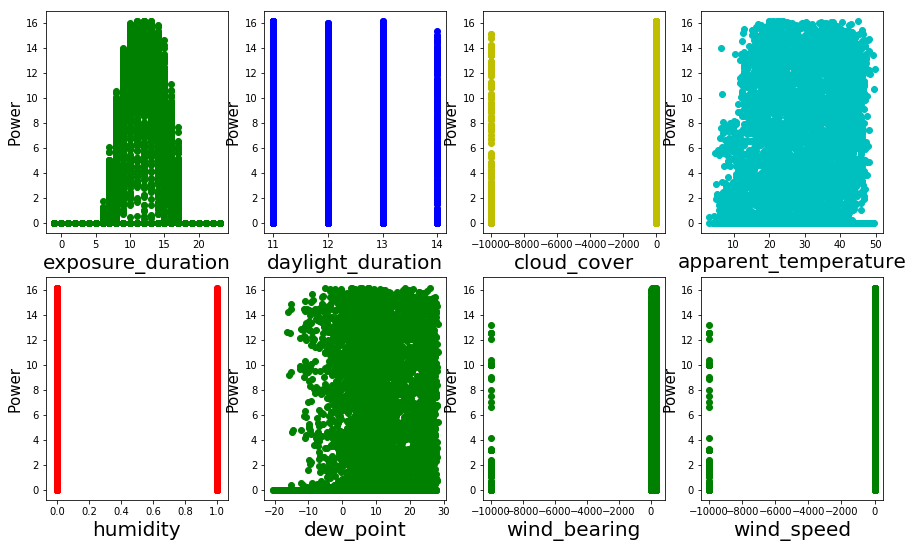

In [63]:
plt.figure(figsize=(15,9))
plt.subplot(2,4,1)
plt.scatter(train_df['exposure_duration'] , train_df['power'],c='g')
plt.xlabel("exposure_duration",fontsize=20)
plt.ylabel("Power",fontsize=15)                                                        

plt.subplot(2,4,2)
plt.scatter(train_df['daylight_duration'] , train_df['power'],c='b')
plt.xlabel("daylight_duration",fontsize=20)
plt.ylabel("Power",fontsize=15)


plt.subplot(2,4,3)
plt.scatter(train_df['cloud_cover'] , train_df['power'] , c='y')
plt.xlabel('cloud_cover',fontsize=20)
plt.ylabel("Power",fontsize=15)

plt.subplot(2,4,4)
plt.scatter(train_df['apparent_temperature'] , train_df['power'], c='c')
plt.xlabel("apparent_temperature",fontsize=20)
plt.ylabel("Power",fontsize=15)

plt.subplot(2,4,5)
plt.scatter(train_df['humidity'] , train_df['power'] ,c='r')
plt.xlabel("humidity",fontsize=20)
plt.ylabel("Power",fontsize=15)

plt.subplot(2,4,6)
plt.scatter(train_df['dew_point'] , train_df['power'],c='g')
plt.xlabel("dew_point",fontsize=20)
plt.ylabel("Power",fontsize=15)


plt.subplot(2,4,7)
plt.scatter(train_df['wind_bearing'] , train_df['power'],c='g')
plt.xlabel("wind_bearing",fontsize=20)
plt.ylabel("Power",fontsize=15)


plt.subplot(2,4,8)
plt.scatter(train_df['wind_speed'] , train_df['power'],c='g')
plt.xlabel("wind_speed",fontsize=20)
plt.ylabel("Power",fontsize=15)


plt.show()


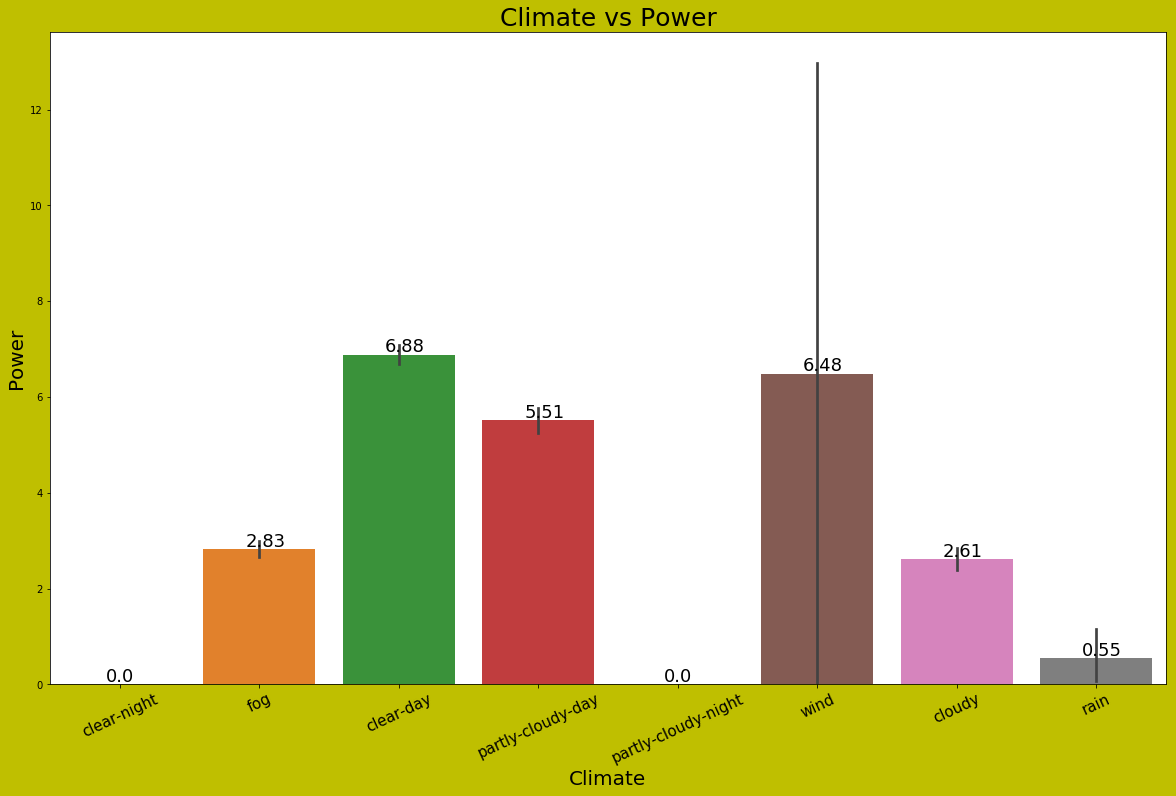

In [64]:
plt.figure(figsize=(20,12),facecolor='y',edgecolor='k')
ax=sns.barplot(x='icon' , y='power' , estimator=np.mean , data=train_df)
plt.title("Climate vs Power",fontsize=25)
plt.xlabel("Climate",fontsize=20)
plt.ylabel("Power",fontsize=20)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.3, i.get_height()+0.05, \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=00)
plt.xticks(fontsize=15,rotation=25)
plt.show()

## Power generation is maximum on clear day as evident from the plot.

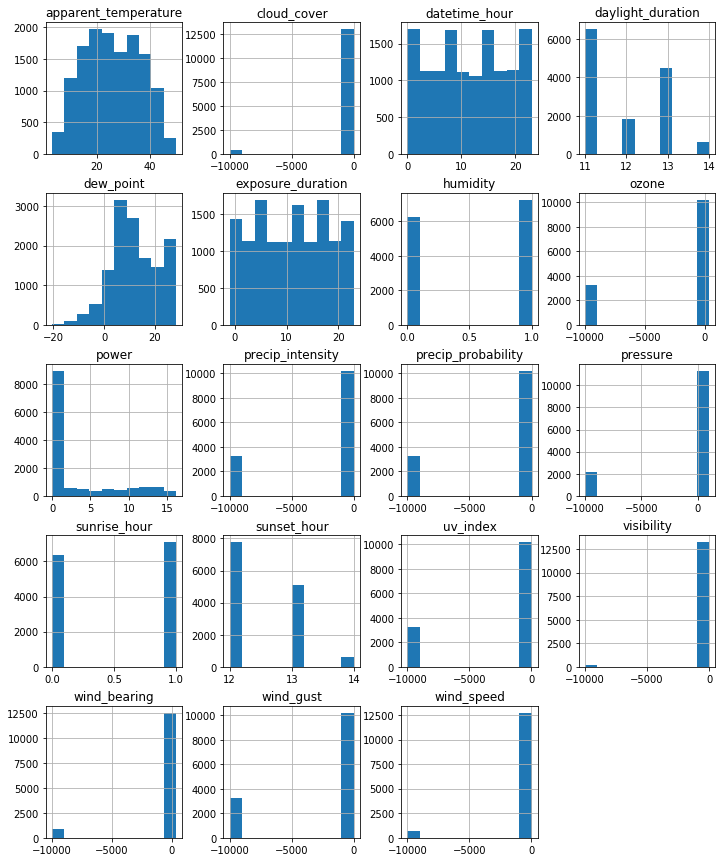

In [65]:
train_df.hist(figsize = (12,15))
plt.show()

## Doing one hot encoding of categorical columns

In [66]:
climate = pd.get_dummies(train_df['icon'],drop_first=True)
train_df['icon'] = pd.factorize(train_df['icon'])[0]

In [67]:
train_df = pd.concat([train_df , climate ], axis=1)

In [68]:
train_df.head()

,power,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,sunset_hour,exposure_duration,daylight_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
0,0.0,0.0,26.52,1,19.46,308,0.83,-9999.0,1007.90,-9999,...,12,0,12,1,0,0,0,0,0,0
1,0.0,0.0,28.78,1,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999,...,12,1,12,0,0,1,0,0,0,0
2,0.0,0.0,26.58,1,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999,...,12,2,12,0,0,1,0,0,0,0
3,0.0,0.0,23.84,1,18.66,270,0.45,-9999.0,1008.12,-9999,...,12,3,12,1,0,0,0,0,0,0
4,0.0,0.0,24.13,1,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999,...,12,4,12,0,0,1,0,0,0,0


In [69]:
  train_df.shape

(13482, 27)

### Dropping the column for which dummy variables were created

In [70]:
train_df.drop(['icon'], axis=1, inplace=True)

In [71]:
train_df.head()

,power,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,sunset_hour,exposure_duration,daylight_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
0,0.0,0.0,26.52,1,19.46,308,0.83,-9999.0,1007.90,-9999,...,12,0,12,1,0,0,0,0,0,0
1,0.0,0.0,28.78,1,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999,...,12,1,12,0,0,1,0,0,0,0
2,0.0,0.0,26.58,1,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999,...,12,2,12,0,0,1,0,0,0,0
3,0.0,0.0,23.84,1,18.66,270,0.45,-9999.0,1008.12,-9999,...,12,3,12,1,0,0,0,0,0,0
4,0.0,0.0,24.13,1,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999,...,12,4,12,0,0,1,0,0,0,0


## Scaling the features

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler= StandardScaler()

num_vars = ['power','cloud_cover','apparent_temperature','humidity','dew_point','wind_bearing','wind_speed','wind_gust',\
           'pressure','uv_index','ozone','precip_intensity','precip_probability','visibility','datetime_hour',\
            'sunrise_hour','sunset_hour','exposure_duration','daylight_duration']

train_df[num_vars] = scaler.fit_transform(train_df[num_vars])

In [74]:
train_df.head()

,power,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,sunset_hour,exposure_duration,daylight_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
0,-0.630756,0.180937,0.062236,0.928107,0.834545,0.316640,0.240200,-1.770399,0.435758,-1.770399,...,-0.80116,-1.573881,0.063451,1,0,0,0,0,0,0
1,-0.630756,0.180937,0.278347,0.928107,0.900498,-3.694123,-4.149568,-1.770399,-2.293259,-1.770399,...,-0.80116,-1.430427,0.063451,0,0,1,0,0,0,0
2,-0.630756,0.180937,0.067973,0.928107,0.890605,-3.694123,-4.149568,-1.770399,-2.293259,-1.770399,...,-0.80116,-1.286972,0.063451,0,0,1,0,0,0,0
3,-0.630756,0.180937,-0.194038,0.928107,0.746608,0.301853,0.240034,-1.770399,0.435813,-1.770399,...,-0.80116,-1.143518,0.063451,1,0,0,0,0,0,0
4,-0.630756,0.180937,-0.166307,0.928107,0.656472,-3.694123,-4.149568,-1.770399,-2.293259,-1.770399,...,-0.80116,-1.000064,0.063451,0,0,1,0,0,0,0


In [75]:
train_df.describe()

,power,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,sunset_hour,exposure_duration,daylight_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
count,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,1.348200e+04,...,1.348200e+04,1.348200e+04,1.348200e+04,13482.000000,13482.000000,13482.000000,13482.000000,13482.000000,13482.000000,13482.000000
mean,1.254069e-15,3.004664e-14,-1.649587e-15,1.235921e-14,-1.246823e-15,-1.094453e-15,1.184658e-15,-1.340070e-14,8.831300e-15,5.474829e-14,...,-6.166689e-14,-9.216449e-17,4.399264e-14,0.228082,0.095609,0.216437,0.127503,0.108144,0.005785,0.000148
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,...,1.000037e+00,1.000037e+00,1.000037e+00,0.419611,0.294065,0.411831,0.333548,0.310574,0.075845,0.012179
min,-6.307564e-01,-5.522680e+00,-2.173462e+00,-1.077461e+00,-3.564514e+00,-3.694123e+00,-4.149568e+00,-1.770399e+00,-2.293259e+00,-1.770399e+00,...,-8.011596e-01,-1.717336e+00,-9.394159e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.307564e-01,1.809371e-01,-8.261146e-01,-1.077461e+00,-6.559904e-01,2.271404e-01,2.405429e-01,5.641148e-01,4.334948e-01,5.644198e-01,...,-8.011596e-01,-8.566090e-01,-9.394159e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.307564e-01,1.809371e-01,-3.625739e-02,9.281074e-01,-1.305656e-01,2.547686e-01,2.408853e-01,5.645677e-01,4.355180e-01,5.644198e-01,...,-8.011596e-01,4.117852e-03,6.345092e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.780241e-01,1.811653e-01,8.243618e-01,9.281074e-01,8.419650e-01,3.108034e-01,2.412891e-01,5.649459e-01,4.374544e-01,5.648868e-01,...,9.193300e-01,8.648447e-01,1.066318e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.687372e+00,1.815075e-01,2.283590e+00,9.281074e-01,1.811748e+00,3.364859e-01,2.441074e-01,5.673924e-01,4.401693e-01,5.672219e-01,...,2.639820e+00,1.725572e+00,2.069185e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
train_df.corr()

,power,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,...,sunset_hour,exposure_duration,daylight_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
power,1.000000,0.013563,0.248030,-0.261721,-0.021021,0.152094,0.124877,-0.005282,-0.002241,-0.004853,...,0.013453,0.073012,0.020051,-0.342841,-0.030509,-0.026281,0.191464,-0.219627,-0.039524,0.008536
cloud_cover,0.013563,1.000000,0.166130,-0.072129,0.062348,0.070114,0.075266,0.320622,0.401426,0.320622,...,0.145116,0.015950,0.167608,0.084241,0.059009,-0.298341,0.069272,0.063103,0.013835,-0.067270
apparent_temperature,0.248030,0.166130,1.000000,-0.188541,0.564746,0.220315,0.187048,0.384604,0.280562,0.384716,...,0.683849,0.304921,0.793175,-0.172754,0.108502,-0.428536,0.339311,0.090893,-0.009930,-0.006190
humidity,-0.261721,-0.072129,-0.188541,1.000000,0.494919,-0.220559,-0.192337,-0.187549,-0.126324,-0.187705,...,-0.056757,-0.248572,-0.025472,-0.119830,0.157587,0.269240,-0.021188,0.086082,0.070799,-0.000910
dew_point,-0.021021,0.062348,0.564746,0.494919,1.000000,-0.007030,-0.006992,0.082241,0.066677,0.082180,...,0.437540,0.001289,0.550659,-0.240943,0.218313,-0.080964,0.247881,0.155216,0.083860,-0.006511
wind_bearing,0.152094,0.070114,0.220315,-0.220559,-0.007030,1.000000,0.890304,0.470755,0.454961,0.470757,...,0.214279,0.106694,0.211800,0.110902,0.082029,-0.472999,0.101846,0.088560,0.018034,0.003416
wind_speed,0.124877,0.075266,0.187048,-0.192337,-0.006992,0.890304,1.000000,0.426803,0.476198,0.426803,...,0.193250,0.092330,0.190652,0.104549,0.078414,-0.430209,0.092211,0.083953,0.018427,0.002957
wind_gust,-0.005282,0.320622,0.384604,-0.187549,0.082241,0.470755,0.426803,1.000000,0.771736,1.000000,...,0.452647,0.029350,0.468212,0.235168,0.183690,-0.850136,0.198792,0.186155,0.043130,-0.021565
pressure,-0.002241,0.401426,0.280562,-0.126324,0.066677,0.454961,0.476198,0.771736,1.000000,0.771736,...,0.348064,-0.008856,0.359496,0.196732,0.141614,-0.698645,0.166287,0.151570,0.033228,-0.027933
uv_index,-0.004853,0.320622,0.384716,-0.187705,0.082180,0.470757,0.426803,1.000000,0.771736,1.000000,...,0.452622,0.029407,0.468188,0.234989,0.183613,-0.850136,0.198956,0.185947,0.043082,-0.021565


## Splitting into X and Y variables

In [77]:
Y = train_df.pop('power')
X = train_df

In [78]:
print('The shape of X variable is :',X.shape)
print('The shape of Y variable is :',Y.shape)

The shape of X variable is : (13482, 25)
The shape of Y variable is : (13482,)


In [79]:
## Split into train and test
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.3)

In [80]:
print('The shape of training_x variable is :',x_train.shape)
print('The shape of training_y variable is :',y_train.shape)
print('The shape of validation_X variable is :',x_valid.shape)
print('The shape of validation_y variable is :',y_valid.shape)

The shape of training_x variable is : (9437, 25)
The shape of training_y variable is : (9437,)
The shape of validation_X variable is : (4045, 25)
The shape of validation_y variable is : (4045,)


## Model  Building and Evaluation

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [83]:
from sklearn import metrics
## predictions
y_train_pred=regressor.predict(x_train)
print('the variance captured in train data, R^2: ',r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=regressor.predict(x_valid)
print('the variance captured  in validation data,R^2: ',r2_score(y_true=y_valid, y_pred=y_test_pred))



the variance captured in train data, R^2:  0.9766333527786063
the variance captured  in validation data,R^2:  0.8405604556524364


In [84]:
#print('the Root mean squared error in train data: ',np.sqrt(mean_squared_error(y_true = y_train , y_pred = y_train_pred)))
#print('the Root mean squared error in validation data: ',np.sqrt(mean_squared_error(y_true = y_valid , y_pred = y_test_pred)))

print('Mean Absolute Error train:', metrics.mean_absolute_error(y_true = y_train , y_pred = y_train_pred))
print('Mean Squared Error train:', metrics.mean_squared_error(y_true = y_train , y_pred = y_train_pred))
print('Root Mean Squared Error train:', np.sqrt(metrics.mean_squared_error(y_true = y_train , y_pred = y_train_pred)))

Mean Absolute Error train: 0.06710774244088336
Mean Squared Error train: 0.023355031069174047
Root Mean Squared Error train: 0.15282352917392678


In [85]:
print('Mean Absolute Error valid:', metrics.mean_absolute_error(y_true = y_valid , y_pred = y_test_pred))
print('Mean Squared Error valid:', metrics.mean_squared_error(y_true = y_valid , y_pred = y_test_pred))
print('Root Mean Squared Error valid:', np.sqrt(metrics.mean_squared_error(y_true = y_valid , y_pred = y_test_pred)))

Mean Absolute Error valid: 0.17806647967875106
Mean Squared Error valid: 0.15962427965789616
Root Mean Squared Error valid: 0.39953007353376563


In [86]:
importances = regressor.feature_importances_
col_names =  x_train.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
df = sorted_feature_importance
df

,colName,value
0,4.512104e-01,uv_index
1,2.147312e-01,datetime_hour
2,6.844413e-02,exposure_duration
3,4.420523e-02,dew_point
4,3.254178e-02,ozone
5,3.076026e-02,apparent_temperature
6,2.894507e-02,pressure
7,2.750538e-02,wind_bearing
8,2.200180e-02,wind_gust
9,1.845264e-02,wind_speed


C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

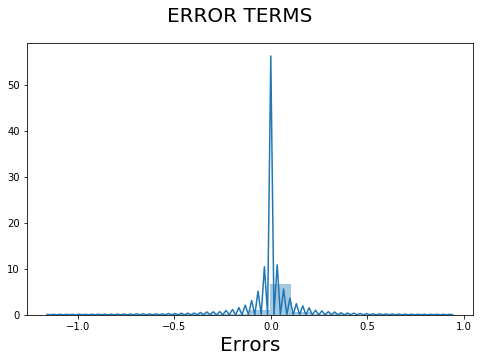

In [87]:
## Plotting the histogram of  error terms
fig=plt.figure(figsize=(8,5))
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle("ERROR TERMS ",fontsize=20)
plt.xlabel("Errors",fontsize=20)

In [88]:
test_df = pd.read_csv("D:\climate_connect\weather_forecast.csv")

In [89]:
test_df.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,9/30/2019 18:30,10/1/2019 0:00,0.35,26.41,26,1,22.01,101,...,NaN,0.0,0.0,NaN,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32
1,1,1,9/30/2019 19:30,10/1/2019 1:00,0.43,25.95,25,1,22.06,105,...,NaN,0.0,0.0,NaN,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32
2,2,1,9/30/2019 20:30,10/1/2019 2:00,0.48,25.46,25,1,22.06,106,...,NaN,0.0,0.0,NaN,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32
3,3,1,9/30/2019 21:30,10/1/2019 3:00,0.49,24.80,24,1,21.87,106,...,NaN,0.0,0.0,NaN,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32
4,4,1,9/30/2019 22:30,10/1/2019 4:00,0.49,23.99,23,1,21.53,100,...,NaN,0.0,0.0,NaN,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32


In [90]:
test_df.shape

(648, 31)

In [91]:
round(test_df.isnull().sum()/len(test_df.index)*100,2)

Unnamed: 0                0.00
plant_id                  0.00
datetime_utc              0.00
datetime_local            0.00
cloud_cover               0.00
apparent_temperature      0.00
temperature               0.00
humidity                  0.00
dew_point                 0.00
wind_bearing              0.00
wind_speed                0.00
wind_chill              100.00
wind_gust                 0.00
heat_index              100.00
pressure                  0.00
qpf                     100.00
uv_index                  0.00
snow                    100.00
pop                     100.00
fctcode                 100.00
ozone                     0.00
precip_accumulation     100.00
precip_intensity          0.00
precip_probability        0.00
precip_type              82.41
visibility                0.00
sunrise                   0.00
sunset                    0.00
icon                      0.00
summary                   0.00
updated_at                0.00
dtype: float64

## Removing columns with high null values

In [92]:
test_df.drop(['precip_type','precip_accumulation','heat_index','qpf','snow','pop','fctcode','wind_chill'],axis=1, inplace=True)

In [93]:
test_df.shape

(648, 23)

In [94]:
test_df.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,9/30/2019 18:30,10/1/2019 0:00,0.35,26.41,26,1,22.01,101,...,0,268.6,0.0,0.0,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32
1,1,1,9/30/2019 19:30,10/1/2019 1:00,0.43,25.95,25,1,22.06,105,...,0,269.1,0.0,0.0,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32
2,2,1,9/30/2019 20:30,10/1/2019 2:00,0.48,25.46,25,1,22.06,106,...,0,269.7,0.0,0.0,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32
3,3,1,9/30/2019 21:30,10/1/2019 3:00,0.49,24.80,24,1,21.87,106,...,0,270.4,0.0,0.0,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32
4,4,1,9/30/2019 22:30,10/1/2019 4:00,0.49,23.99,23,1,21.53,100,...,0,271.3,0.0,0.0,16.09,10/1/2019 0:51,10/1/2019 12:45,partly-cloudy-night,Partly Cloudy,10/2/2019 23:32


## Removing column which will not add any significance  to our model

In [95]:
test_df.drop(['Unnamed: 0','datetime_utc','updated_at','summary','plant_id','temperature'],axis=1, inplace=True)

In [96]:
test_df.shape

(648, 17)

In [97]:
round(test_df.isnull().sum()/len(test_df.index)*100,2)

datetime_local          0.0
cloud_cover             0.0
apparent_temperature    0.0
humidity                0.0
dew_point               0.0
wind_bearing            0.0
wind_speed              0.0
wind_gust               0.0
pressure                0.0
uv_index                0.0
ozone                   0.0
precip_intensity        0.0
precip_probability      0.0
visibility              0.0
sunrise                 0.0
sunset                  0.0
icon                    0.0
dtype: float64

## Doing feature engineering

In [98]:
test_df[['datetime_local','sunrise','sunset']].head()

,datetime_local,sunrise,sunset
0,10/1/2019 0:00,10/1/2019 0:51,10/1/2019 12:45
1,10/1/2019 1:00,10/1/2019 0:51,10/1/2019 12:45
2,10/1/2019 2:00,10/1/2019 0:51,10/1/2019 12:45
3,10/1/2019 3:00,10/1/2019 0:51,10/1/2019 12:45
4,10/1/2019 4:00,10/1/2019 0:51,10/1/2019 12:45


In [99]:
test_df['datetime_local'] = test_df['datetime_local'].astype(str)
test_df['datetime_local'] = test_df['datetime_local'].str.replace('/','-')
test_df['datetime_local'] = pd.to_datetime(test_df['datetime_local'],dayfirst=True)

In [100]:
test_df['sunrise'] = test_df['sunrise'].astype(str)
test_df['sunrise'] = test_df['sunrise'].str.replace('/','-')
test_df['sunrise'] = pd.to_datetime(test_df['sunrise'],dayfirst=True)

In [101]:
test_df['sunset'] = test_df['sunset'].astype(str)
test_df['sunset'] = test_df['sunset'].str.replace('/','-')
test_df['sunset'] = pd.to_datetime(test_df['sunset'],dayfirst=True)

In [102]:
test_df[['datetime_local','sunrise','sunset']].head()

,datetime_local,sunrise,sunset
0,2019-01-10 00:00:00,2019-01-10 00:51:00,2019-01-10 12:45:00
1,2019-01-10 01:00:00,2019-01-10 00:51:00,2019-01-10 12:45:00
2,2019-01-10 02:00:00,2019-01-10 00:51:00,2019-01-10 12:45:00
3,2019-01-10 03:00:00,2019-01-10 00:51:00,2019-01-10 12:45:00
4,2019-01-10 04:00:00,2019-01-10 00:51:00,2019-01-10 12:45:00


## making another column showing hours of the timestamp

In [103]:
test_df['datetime_hour'] = test_df['datetime_local'].dt.hour

In [104]:
test_df[['datetime_hour','datetime_local']].head()

,datetime_hour,datetime_local
0,0,2019-01-10 00:00:00
1,1,2019-01-10 01:00:00
2,2,2019-01-10 02:00:00
3,3,2019-01-10 03:00:00
4,4,2019-01-10 04:00:00


In [105]:
test_df['sunrise_hour'] = test_df['sunrise'].dt.hour

In [106]:
test_df['sunset_hour'] = test_df['sunset'].dt.hour

In [107]:
test_df[['sunrise_hour','sunset_hour']].head()

,sunrise_hour,sunset_hour
0,0,12
1,0,12
2,0,12
3,0,12
4,0,12


In [108]:
test_df['exposure_duration'] = test_df['datetime_hour'] -  test_df['sunrise_hour']

In [109]:
test_df.exposure_duration.head()

0    0
1    1
2    2
3    3
4    4
Name: exposure_duration, dtype: int64

In [110]:
 test_df['daylight_duration']= test_df['sunset_hour'] - test_df['sunrise_hour']

In [111]:
test_df['daylight_duration'].head()

0    12
1    12
2    12
3    12
4    12
Name: daylight_duration, dtype: int64

In [112]:
test_df.drop(['datetime_local','sunrise','sunset'] ,axis=1 , inplace=True)

In [113]:
test_df.icon.value_counts()

clear-night            265
clear-day              225
partly-cloudy-day       64
partly-cloudy-night     64
cloudy                  30
Name: icon, dtype: int64

## Doing one hot encoding of categorical column

In [114]:
climate_new = pd.get_dummies(test_df['icon'],drop_first=True)

In [115]:
test_df = pd.concat([test_df , climate_new ], axis=1)

In [116]:
test_df.drop(['icon'], axis=1, inplace=True)

In [117]:
test_df.head()

,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,...,visibility,datetime_hour,sunrise_hour,sunset_hour,exposure_duration,daylight_duration,clear-night,cloudy,partly-cloudy-day,partly-cloudy-night
0,0.35,26.41,1,22.01,101,3.08,6.42,1008.45,0,268.6,...,16.09,0,0,12,0,12,0,0,0,1
1,0.43,25.95,1,22.06,105,2.94,6.28,1008.24,0,269.1,...,16.09,1,0,12,1,12,0,0,0,1
2,0.48,25.46,1,22.06,106,2.82,6.08,1007.90,0,269.7,...,16.09,2,0,12,2,12,0,0,0,1
3,0.49,24.80,1,21.87,106,2.63,5.74,1007.61,0,270.4,...,16.09,3,0,12,3,12,0,0,0,1
4,0.49,23.99,1,21.53,100,2.39,5.30,1007.51,0,271.3,...,16.09,4,0,12,4,12,0,0,0,1


In [118]:
test_new = test_df

In [119]:
scaler= StandardScaler()

num_vars = ['cloudy','cloud_cover','apparent_temperature','humidity','dew_point','wind_bearing','wind_speed','wind_gust',\
           'pressure','uv_index','ozone','precip_intensity','precip_probability','visibility','datetime_hour',\
            'sunrise_hour','sunset_hour','exposure_duration','daylight_duration']

test_new[num_vars] = scaler.fit_transform(test_new[num_vars])

In [120]:
test_new.head()

,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,...,visibility,datetime_hour,sunrise_hour,sunset_hour,exposure_duration,daylight_duration,clear-night,cloudy,partly-cloudy-day,partly-cloudy-night
0,0.767213,-0.250906,0.972598,1.998152,-0.371283,1.144739,1.930617,-1.523428,-0.649491,-2.228805,...,0.0,-1.661325,-0.894427,0.0,-1.593020,0.894427,0,-0.220326,0,1
1,1.059958,-0.351058,0.972598,2.011988,-0.336970,0.959546,1.839240,-1.630780,-0.649491,-2.073821,...,0.0,-1.516862,-0.894427,0.0,-1.448928,0.894427,0,-0.220326,0,1
2,1.242923,-0.457741,0.972598,2.011988,-0.328392,0.800809,1.708702,-1.804588,-0.649491,-1.887840,...,0.0,-1.372399,-0.894427,0.0,-1.304835,0.894427,0,-0.220326,0,1
3,1.279516,-0.601437,0.972598,1.959411,-0.328392,0.549476,1.486787,-1.952835,-0.649491,-1.670862,...,0.0,-1.227936,-0.894427,0.0,-1.160743,0.894427,0,-0.220326,0,1
4,1.279516,-0.777791,0.972598,1.865325,-0.379861,0.232002,1.199602,-2.003955,-0.649491,-1.391891,...,0.0,-1.083473,-0.894427,0.0,-1.016651,0.894427,0,-0.220326,0,1


In [121]:
test_new.shape

(648, 22)

In [122]:
test_new.head()

,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,...,visibility,datetime_hour,sunrise_hour,sunset_hour,exposure_duration,daylight_duration,clear-night,cloudy,partly-cloudy-day,partly-cloudy-night
0,0.767213,-0.250906,0.972598,1.998152,-0.371283,1.144739,1.930617,-1.523428,-0.649491,-2.228805,...,0.0,-1.661325,-0.894427,0.0,-1.593020,0.894427,0,-0.220326,0,1
1,1.059958,-0.351058,0.972598,2.011988,-0.336970,0.959546,1.839240,-1.630780,-0.649491,-2.073821,...,0.0,-1.516862,-0.894427,0.0,-1.448928,0.894427,0,-0.220326,0,1
2,1.242923,-0.457741,0.972598,2.011988,-0.328392,0.800809,1.708702,-1.804588,-0.649491,-1.887840,...,0.0,-1.372399,-0.894427,0.0,-1.304835,0.894427,0,-0.220326,0,1
3,1.279516,-0.601437,0.972598,1.959411,-0.328392,0.549476,1.486787,-1.952835,-0.649491,-1.670862,...,0.0,-1.227936,-0.894427,0.0,-1.160743,0.894427,0,-0.220326,0,1
4,1.279516,-0.777791,0.972598,1.865325,-0.379861,0.232002,1.199602,-2.003955,-0.649491,-1.391891,...,0.0,-1.083473,-0.894427,0.0,-1.016651,0.894427,0,-0.220326,0,1


In [123]:
missing_cols = set( x_train.columns ) - set( test_new.columns )

In [124]:
# Add a missing column in test set with default value equal to 0
for i in missing_cols:
    test_df[i] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_new = test_df[x_train.columns]

In [125]:
test_new.shape

(648, 25)

In [126]:
Y_pred=regressor.predict(test_new)

In [127]:
print(Y_pred)

[-0.59127147 -0.59127147 -0.59127147 -0.59127147 -0.58932084 -0.58932084
 -0.61258449 -0.48540347 -0.08264923  0.26444011  0.59352205  0.90545895
  0.96079531  0.92260398  0.7965726   0.35496999  0.09066958 -0.32350099
 -0.61823126 -0.60562401 -0.62599224 -0.62599224 -0.62599224 -0.62599224
 -0.63075589 -0.63075589 -0.63075589 -0.63075589 -0.63075589 -0.63032518
 -0.57139546 -0.5193034  -0.18921536  0.31098836  0.45812763  0.81710557
  0.73770457  0.62951635  0.52800134  0.65797504  0.02849574 -0.41585829
 -0.62936013 -0.63032518 -0.63075589 -0.61925791 -0.58624083 -0.58624083
 -0.58624083 -0.59084024 -0.58624083 -0.58624083 -0.58624083 -0.61242043
 -0.60895016 -0.53277303 -0.02289829  0.35679742  0.79829737  0.7322428
  0.80047387  0.52697469  0.65450497  0.70086842  0.11516541 -0.4758967
 -0.62467861 -0.62599224 -0.62599224 -0.62599224 -0.62599224 -0.62599224
 -0.63075589 -0.63075589 -0.63075589 -0.63075589 -0.63075589 -0.6256642
 -0.59262644 -0.55416839 -0.03495114  0.61604672  0.44

In [128]:
test_new.dtypes

cloud_cover             float64
apparent_temperature    float64
humidity                float64
dew_point               float64
wind_bearing            float64
wind_speed              float64
wind_gust               float64
pressure                float64
uv_index                float64
ozone                   float64
precip_intensity        float64
precip_probability      float64
visibility              float64
datetime_hour           float64
sunrise_hour            float64
sunset_hour             float64
exposure_duration       float64
daylight_duration       float64
clear-night               uint8
cloudy                  float64
fog                       int64
partly-cloudy-day         uint8
partly-cloudy-night       uint8
rain                      int64
wind                      int64
dtype: object

In [129]:
type(Y_pred)

numpy.ndarray

In [130]:
Y_pred.shape

(648,)

In [131]:
test_new['power_predicted'] = Y_pred

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
test_new.head()

,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,...,exposure_duration,daylight_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind,power_predicted
0,0.767213,-0.250906,0.972598,1.998152,-0.371283,1.144739,1.930617,-1.523428,-0.649491,-2.228805,...,-1.593020,0.894427,0,-0.220326,0,0,1,0,0,-0.591271
1,1.059958,-0.351058,0.972598,2.011988,-0.336970,0.959546,1.839240,-1.630780,-0.649491,-2.073821,...,-1.448928,0.894427,0,-0.220326,0,0,1,0,0,-0.591271
2,1.242923,-0.457741,0.972598,2.011988,-0.328392,0.800809,1.708702,-1.804588,-0.649491,-1.887840,...,-1.304835,0.894427,0,-0.220326,0,0,1,0,0,-0.591271
3,1.279516,-0.601437,0.972598,1.959411,-0.328392,0.549476,1.486787,-1.952835,-0.649491,-1.670862,...,-1.160743,0.894427,0,-0.220326,0,0,1,0,0,-0.591271
4,1.279516,-0.777791,0.972598,1.865325,-0.379861,0.232002,1.199602,-2.003955,-0.649491,-1.391891,...,-1.016651,0.894427,0,-0.220326,0,0,1,0,0,-0.589321


In [133]:
num_vars = ['cloud_cover','apparent_temperature','humidity','dew_point','wind_bearing','wind_speed','wind_gust',\
           'pressure','uv_index','ozone','precip_intensity','precip_probability','visibility','datetime_hour',\
            'sunrise_hour','sunset_hour','exposure_duration','daylight_duration','power_predicted']


In [134]:
test_new[num_vars] = scaler.inverse_transform(test_new[num_vars])

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\apurv\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [135]:
test_new.head()

,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,...,exposure_duration,daylight_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind,power_predicted
0,0.207508,0.071773,32.029601,1.512580,13.447533,277.730760,3.674098,1.127997,1010.159584,-3.868827,...,10.406980,17.262879,0,-0.220326,0,0,1,0,0,11.26175
1,0.269021,0.044404,32.029601,1.519495,13.571529,256.141812,3.605020,0.963521,1010.159584,-3.489164,...,10.551072,17.262879,0,-0.220326,0,0,1,0,0,11.26175
2,0.307467,0.015250,32.029601,1.519495,13.602528,237.636999,3.506337,0.697227,1010.159584,-3.033569,...,10.695165,17.262879,0,-0.220326,0,0,1,0,0,11.26175
3,0.315156,-0.024018,32.029601,1.493216,13.602528,208.337712,3.338577,0.470094,1010.159584,-2.502042,...,10.839257,17.262879,0,-0.220326,0,0,1,0,0,11.26175
4,0.315156,-0.072212,32.029601,1.446192,13.416534,171.328086,3.121475,0.391773,1010.159584,-1.818649,...,10.983349,17.262879,0,-0.220326,0,0,1,0,0,11.26272


In [136]:
test_new.describe()

,cloud_cover,apparent_temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,...,exposure_duration,daylight_duration,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind,power_predicted
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,...,648.000000,648.000000,648.000000,6.480000e+02,648.0,648.000000,648.000000,648.0,648.0,648.000000
mean,0.046296,0.140340,27.562423,0.513889,14.789244,144.282407,2.214614,3.462068,1011.430108,1.591049,...,12.000000,11.055556,0.408951,-4.570247e-16,0.0,0.098765,0.098765,0.0,0.0,11.467413
std,0.210288,0.273487,4.596587,0.500193,3.616508,116.665398,0.756552,1.533301,1.957697,2.451580,...,1.000772,6.945360,0.492020,1.000772e+00,0.0,0.298577,0.298577,0.0,0.0,0.298579
min,-0.061613,-0.410754,22.839977,-1.123577,10.316637,-104.702039,0.920850,-0.853542,1010.159584,-8.272913,...,10.262888,3.296401,0.000000,-2.203263e-01,0.0,0.000000,0.000000,0.0,0.0,11.242130
25%,-0.061613,-0.082475,22.839977,0.213864,11.920834,64.925412,1.675773,2.441843,1010.159584,0.459327,...,11.127441,3.296401,0.000000,-2.203263e-01,0.0,0.000000,0.000000,0.0,0.0,11.242957
50%,-0.061613,0.116099,32.029601,0.529207,13.695525,138.173630,2.035965,3.411074,1010.159584,1.826112,...,11.991995,17.262879,0.000000,-2.203263e-01,0.0,0.000000,0.000000,0.0,0.0,11.264250
75%,0.022968,0.400944,32.029601,0.844896,18.794857,216.433567,2.504708,4.409676,1012.555218,2.965100,...,12.856548,17.262879,1.000000,-2.203263e-01,0.0,0.000000,0.000000,0.0,0.0,11.732842
max,0.707303,0.662586,32.029601,1.559604,21.445270,485.909904,5.706962,7.746180,1016.547943,8.508174,...,13.721102,17.262879,1.000000,4.538722e+00,0.0,1.000000,1.000000,0.0,0.0,12.331822


C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


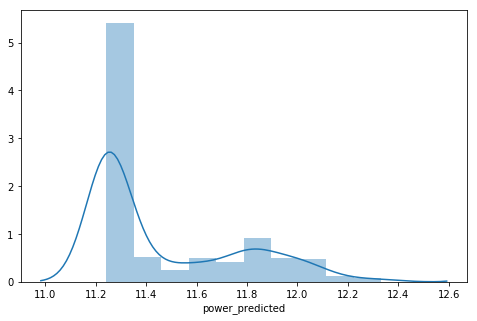

In [137]:
plt.figure(figsize=(8,5))
sns.distplot(test_new['power_predicted'], hist= True)